In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import data

In [40]:
# income and debt
# linux path
wealth_file = 'data_files/2016_median_wealth_and_debt.csv'
wealth_df = pd.read_csv(wealth_file)

# income over time
income_file = 'data_files/income_estimates_by_year_and_race.csv'
income_df = pd.read_csv(income_file)

# pop estimates
pop_file = 'data_files/2019_population_estimates.csv'
pop_df = pd.read_csv(pop_file)

In [41]:
wealth_df.head()

,race,median_value_assets,std_error_value,median_debt,std_error_debt
0,White alone,114700,3874,66600,102000
1,"White alone, not Hispanic",143600,3988,72600,86190
2,Black alone,12920,2414,34500,16920
3,Asian alone,210100,20070,107000,6727
4,Other (residual),20140,5951,42000,3970


In [42]:
income_df.head()

,race,year,median_income,std_median_income,mean_income,std_mean_income
0,all_races,2018,63179,420,90021.0,546
1,all_races,2017,62626,330,89779.0,584
2,all_races,2016,61779,456,87001.0,491
3,all_races,2015,59901,340,84011.0,427
4,all_races,2014,56969,416,80413.0,474


In [43]:
    pop_df

,race,pop_perc
0,"White alone, percent",0.765
1,"Black or African American alone, percent",0.134
2,"American Indian and Alaska Native alone, percent",0.013
3,"Asian alone, percent",0.059
4,Native Hawaiian and Other Pacific Islander alo...,0.002
5,"Two or More Races, percent",0.027
6,"Hispanic or Latino, percent",0.183
7,"White alone, not Hispanic or Latino, percent",0.604


# Data transformations

In [44]:
white_income = wealth_df.median_value_assets.iloc[1]

In [45]:
# calculate % income based on white alone, not hispanic

wealth_df['median_perc_income_of_white'] = wealth_df.median_value_assets / white_income

In [46]:
wealth_df

,race,median_value_assets,std_error_value,median_debt,std_error_debt,median_perc_income_of_white
0,White alone,114700,3874,66600,102000,0.798747
1,"White alone, not Hispanic",143600,3988,72600,86190,1.000000
2,Black alone,12920,2414,34500,16920,0.089972
3,Asian alone,210100,20070,107000,6727,1.463092
4,Other (residual),20140,5951,42000,3970,0.140251
5,Hispanic origin (any race),21420,3182,36000,17560,0.149164
6,Not of Hispanic origin,111800,2820,65000,112100,0.778552


# EDA Graphs

In [47]:
income_df.mean_income[income_df.race == 'all_races']

0     90021.0
1     89779.0
2     87001.0
3     84011.0
4     80413.0
5     81189.0
6     78095.0
7     77962.0
8     77783.0
9     79751.0
10    79997.0
11    82081.0
12    83111.0
13    81647.0
14    80578.0
15    80840.0
16    80975.0
17    82758.0
18    83545.0
19    82754.0
20    80067.0
21    77766.0
22    75340.0
23    73760.0
24    72503.0
25    71091.0
26    68330.0
27    68374.0
28    69892.0
29    71607.0
30    69615.0
31    68723.0
32    67465.0
33    64868.0
34    63397.0
35    61075.0
36    60946.0
37    60580.0
38    61283.0
39    63264.0
40    62802.0
41    60939.0
42    60045.0
43    58636.0
44    60301.0
45    61584.0
46    60751.0
47    57566.0
48    57877.0
49    57954.0
50    55565.0
51    52662.0
Name: mean_income, dtype: float64

In [48]:
income_df.year[income_df.race == 'all_races']

0     2018
1     2017
2     2016
3     2015
4     2014
5     2013
6     2012
7     2011
8     2010
9     2009
10    2008
11    2007
12    2006
13    2005
14    2004
15    2003
16    2002
17    2001
18    2000
19    1999
20    1998
21    1997
22    1996
23    1995
24    1994
25    1993
26    1992
27    1991
28    1990
29    1989
30    1988
31    1987
32    1986
33    1985
34    1984
35    1983
36    1982
37    1981
38    1980
39    1979
40    1978
41    1977
42    1976
43    1975
44    1974
45    1973
46    1972
47    1971
48    1970
49    1969
50    1968
51    1967
Name: year, dtype: int64

In [49]:
list(income_df.race.unique())

['all_races',
 'white_alone',
 'white_alone_not_hispanic',
 'black_alone_or_in_combo',
 'black_alone',
 'asian_alone_or_in_combo',
 'asian_alone',
 'asian_and_pacific_islander',
 'hispanic']

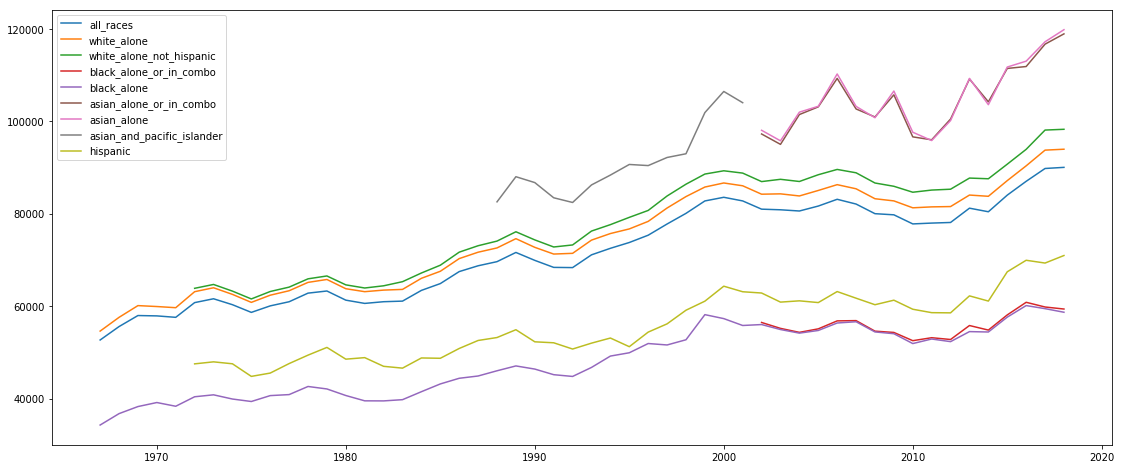

<Figure size 432x288 with 0 Axes>

In [57]:
# income over time lines

races = list(income_df.race.unique())

plt.figure(figsize=(19,8))

for race in races:
    x_years = income_df.year[income_df.race == race]
    mean_incomes = income_df.mean_income[income_df.race == race]
    plt.plot(x_years, mean_incomes, label=race)

plt.legend()
plt.show()
#plt.savefig("income_over_time.png")

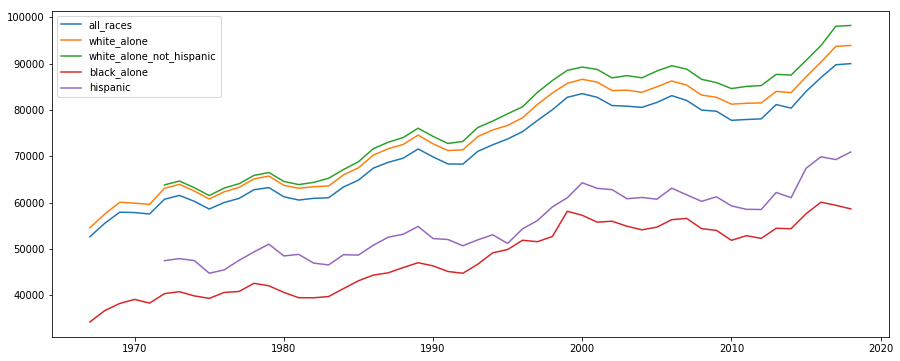

In [60]:
# Income over time
# only include white alone, not hispanic, black, and hispanic

filtered_races = ['all_races', 'white_alone', 'white_alone_not_hispanic', \
                    'black_alone', 'hispanic']
                    
plt.figure(figsize=(15,6))

for race in filtered_races:
    x_years = income_df.year[income_df.race == race]
    mean_incomes = income_df.mean_income[income_df.race == race]
    plt.plot(x_years, mean_incomes, label=race)

plt.legend()
plt.show()